# Problem Statement:
### To classify a given review into a positive or a negative review using sentiment analysis in Machine Learning


# Importing the libraries:

In [1]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
## checking the version of packages
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


1.0.1
1.18.1
0.10.0


# Reading the dataset

In [2]:
#reading the data
data = pd.read_csv("IMDB dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#checking the shape of the data
data.shape

(50000, 2)

## Description about data

In [4]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 390.7+ KB


In [5]:
#description of the data
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


# Statistical Analysis

In [6]:
#describing the target column
data['sentiment'].describe()

count        50000
unique           2
top       negative
freq         25000
Name: sentiment, dtype: object

In [7]:
#checking the count of positives and negatives
data.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

# Visualising the data

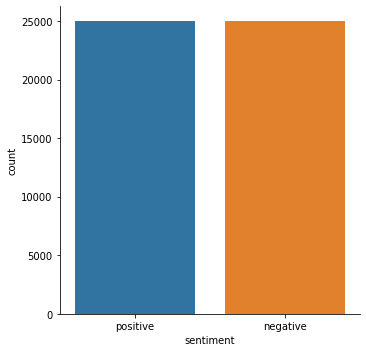

In [8]:
#visualization of the target column
sns.catplot("sentiment",data=data,kind='count')

# Data Cleaning/ Data Pre-processing:

In [9]:
#checking for any missing values
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
#splitting data into input(x) 
X=data.review
X.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [11]:
#splitting data into output(y)
y=data.sentiment
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [12]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.review, data.sentiment, 
                                            test_size= 0.2, random_state=1 )


In [13]:
#printing the shapes of inputs and outputs
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40000,)
(40000,)
(10000,)
(10000,)


In [83]:
train_accu=np.zeros(3) #to store train accuracies
test_accu=np.zeros(3) #to store test accuracies

In [74]:
##Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# creating an object for CountVectorizer
count_vect = CountVectorizer()

In [15]:
# Generate the word counts for the words in the documents
word_count_vector = count_vect.fit(X_train)

# To get the feature names
word_count_vector.get_feature_names()

['00',
 '000',
 '00000000000',
 '0000000000001',
 '00001',
 '00015',
 '000dm',
 '001',
 '003830',
 '0069',
 '007',
 '0079',
 '007s',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00o',
 '00pm',
 '00s',
 '00schneider',
 '01',
 '0148',
 '01pm',
 '02',
 '020410',
 '0230',
 '03',
 '039',
 '04',
 '041',
 '044',
 '05',
 '050',
 '05nomactr',
 '06',
 '0615',
 '06th',
 '07',
 '07b',
 '08',
 '089',
 '08th',
 '09',
 '0and',
 '0f',
 '0r',
 '0s',
 '0tt',
 '10',
 '100',
 '1000',
 '10000',
 '1000000',
 '10000000000',
 '10000000000000',
 '10000th',
 '1000s',
 '1001',
 '1004',
 '100b',
 '100bt',
 '100ft',
 '100ibs',
 '100k',
 '100m',
 '100miles',
 '100min',
 '100mins',
 '100mph',
 '100s',
 '100th',
 '100times',
 '100x',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '105',
 '1050',
 '106',
 '106min',
 '107',
 '108',
 '1080p',
 '109',
 '10_',
 '10am',
 '10ft',
 '10k',
 '10lines',
 '10mil',
 '10mins',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yo',
 '10yr',

In [16]:
#TFIDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
#initialize an object for the tfidf vectorizer
tfidf = TfidfVectorizer()

In [17]:
#apply the tfidf to the data(X_train)

X_train_transformed = tfidf.fit_transform(X_train)
X_train_transformed

<40000x93163 sparse matrix of type '<class 'numpy.float64'>'
	with 5471200 stored elements in Compressed Sparse Row format>

In [18]:
#apply the tfidf to the data(X_test)
X_test_transformed = tfidf.transform(X_test)
X_test_transformed

<10000x93163 sparse matrix of type '<class 'numpy.float64'>'
	with 1345978 stored elements in Compressed Sparse Row format>

In [19]:
#Feature names
tfidf.get_feature_names()

['00',
 '000',
 '00000000000',
 '0000000000001',
 '00001',
 '00015',
 '000dm',
 '001',
 '003830',
 '0069',
 '007',
 '0079',
 '007s',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00o',
 '00pm',
 '00s',
 '00schneider',
 '01',
 '0148',
 '01pm',
 '02',
 '020410',
 '0230',
 '03',
 '039',
 '04',
 '041',
 '044',
 '05',
 '050',
 '05nomactr',
 '06',
 '0615',
 '06th',
 '07',
 '07b',
 '08',
 '089',
 '08th',
 '09',
 '0and',
 '0f',
 '0r',
 '0s',
 '0tt',
 '10',
 '100',
 '1000',
 '10000',
 '1000000',
 '10000000000',
 '10000000000000',
 '10000th',
 '1000s',
 '1001',
 '1004',
 '100b',
 '100bt',
 '100ft',
 '100ibs',
 '100k',
 '100m',
 '100miles',
 '100min',
 '100mins',
 '100mph',
 '100s',
 '100th',
 '100times',
 '100x',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '105',
 '1050',
 '106',
 '106min',
 '107',
 '108',
 '1080p',
 '109',
 '10_',
 '10am',
 '10ft',
 '10k',
 '10lines',
 '10mil',
 '10mins',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yo',
 '10yr',

In [20]:
# position of the words
tfidf.vocabulary_

{'this': 82770,
 'film': 30396,
 'has': 37275,
 'been': 8238,
 'compared': 17187,
 'to': 83469,
 'the': 82503,
 'hilarious': 38473,
 'british': 11525,
 'comedy': 16954,
 'fish': 30690,
 'called': 12851,
 'wanda': 89606,
 'although': 3626,
 'can': 13020,
 'see': 72931,
 'why': 90722,
 'only': 58689,
 'connection': 17782,
 'find': 30513,
 'is': 42841,
 'monty': 54568,
 'python': 65803,
 'one': 58660,
 'eric': 27675,
 'idle': 40350,
 'in': 40978,
 'nuns': 57814,
 'john': 43970,
 'cleese': 16085,
 'and': 4125,
 'michael': 53058,
 'palin': 60138,
 'otherwise': 59249,
 'two': 85524,
 'are': 5175,
 'incomparable': 41142,
 'br': 10973,
 'robbie': 69795,
 'coltrane': 16886,
 'gangsters': 33156,
 'who': 90657,
 'want': 89640,
 'get': 33887,
 'out': 59311,
 'of': 58320,
 'business': 12394,
 'before': 8286,
 'they': 82672,
 'end': 27031,
 'up': 87431,
 'dead': 20920,
 'so': 76375,
 'decide': 21128,
 'rip': 69576,
 'off': 58327,
 'their': 82536,
 'boss': 10742,
 'make': 50369,
 'for': 31527,
 'rio'

In [21]:
# Idf of the terms
tfidf.idf_

array([ 6.54041393,  5.70778177, 10.90351255, ..., 10.90351255,
       10.90351255, 10.90351255])

# Naive Bayes

In [150]:
# Apply the naive bayes algorithm
from sklearn.naive_bayes import BernoulliNB
#creating an object
model_BernNB = BernoulliNB()

In [151]:
# Applying the Algorithm to the data
# ObjectName.fit(Input, Output)

model_BernNB.fit(X_train_transformed, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [152]:
# Prediction on Train Data
# Syntax: objectname.predict(InputValues)
y_train_pred = model_BernNB.predict(X_train_transformed)

In [153]:
# compare the actual values(y_train) with predicted values(y_train_pred)
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
confusion_matrix(y_train,y_train_pred)

array([[18376,  1580],
       [ 2494, 17550]], dtype=int64)

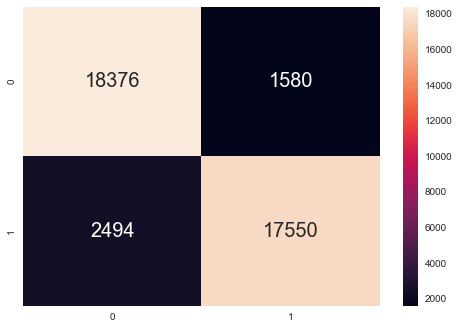

In [154]:
#visualization of the confusion matrix
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [155]:
#printing the classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

    negative       0.88      0.92      0.90     19956
    positive       0.92      0.88      0.90     20044

    accuracy                           0.90     40000
   macro avg       0.90      0.90      0.90     40000
weighted avg       0.90      0.90      0.90     40000



In [156]:
#checking the accuracy fot training data
train_accu[0]=accuracy_score(y_train,y_train_pred)
print("Naive Baye's Train Accuracy: ",train_accu[0])


Naive Baye's Train Accuracy:  0.89815


In [157]:
# prediction on test data
# syntax: objectname.predict(input)
y_test_pred = model_BernNB.predict(X_test_transformed)

In [158]:
# compare the actual values(y_test) with predicted values(y_test_pred)

confusion_matrix(y_test,y_test_pred)

array([[4431,  613],
       [ 780, 4176]], dtype=int64)

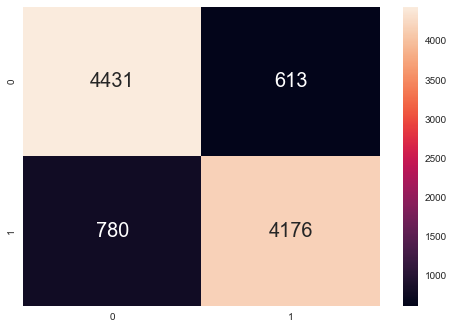

In [159]:
#visualization of the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [160]:
#checking the accuracy for testing data
test_accu[0]=accuracy_score(y_test,y_test_pred)
print("Naive Baye's Test Accuracy: ",test_accu[0])

Naive Baye's Test Accuracy:  0.8607


In [161]:
#printing the classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    negative       0.85      0.88      0.86      5044
    positive       0.87      0.84      0.86      4956

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Logistic Regression

In [162]:
# build the classifier on training data
#sklearn library: import,instantiate,fit
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_transformed,y_train)  #input and output will be passed to fit method

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
#predicting on train data
# syntax : objectname.predict(Input)
y_train_pred =reg.predict(X_train_transformed)
y_train_pred

array(['negative', 'positive', 'positive', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [164]:
# confusion matrix for the training data
# confusion matrix(actual values,predicted values)
from sklearn.metrics import confusion_matrix , accuracy_score
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[18422,  1534],
       [ 1239, 18805]], dtype=int64)

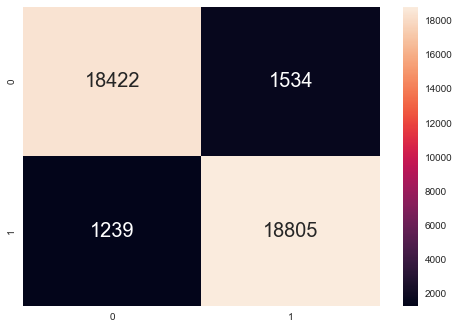

In [165]:
#visualization of the confusion matrix
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [166]:
#checking the accuracy fot training data
train_accu[1]=accuracy_score(y_train,y_train_pred)
print("LogisticRegression Train Accuracy: ",train_accu[1])


LogisticRegression Train Accuracy:  0.930675


In [167]:
#printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred)) 

              precision    recall  f1-score   support

    negative       0.94      0.92      0.93     19956
    positive       0.92      0.94      0.93     20044

    accuracy                           0.93     40000
   macro avg       0.93      0.93      0.93     40000
weighted avg       0.93      0.93      0.93     40000



In [168]:
#predicting on testing data
y_test_pred =reg.predict(X_test_transformed)
y_test_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'positive',
       'negative'], dtype=object)

In [169]:
#printing the confusion matrix
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[4482,  562],
       [ 454, 4502]], dtype=int64)

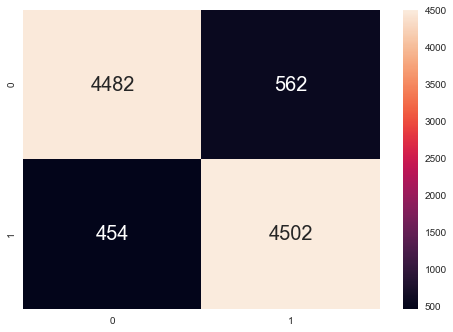

In [170]:
#visualization of the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [171]:
#checking the accuracy for testing data

test_accu[1]=accuracy_score(y_test,y_test_pred)

print("LogisticRegression Test Accuracy: ",test_accu[1])

LogisticRegression Test Accuracy:  0.8984


In [172]:
#printing the classification report
print(classification_report(y_test,y_test_pred)) 

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5044
    positive       0.89      0.91      0.90      4956

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Random Forest Classification

In [173]:
#Import, intialize and fit

#Import the RfC from sklearn
from sklearn.ensemble import RandomForestClassifier


#Initilaize the object for RFC
rfc = RandomForestClassifier(n_estimators = 40)

#fit the TFC to the dataset
rfc.fit(X_train_transformed,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [174]:
#Prediction on training data
#Syntax: ojectname.predict(InputValues)
y_train_pred = rfc.predict(X_train_transformed)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     19956
    positive       1.00      1.00      1.00     20044

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



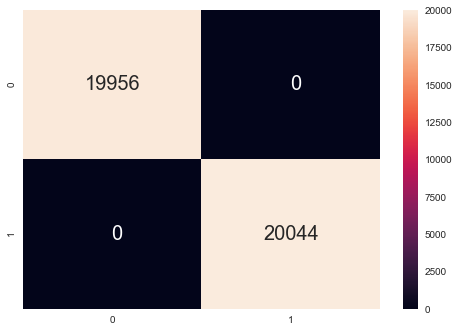

In [175]:
#visualization of the confusion matrix
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [176]:
#checking the accuracy fot training data
train_accu[2]=accuracy_score(y_train,y_train_pred)

print("Random Forest Classification Train Accuracy: ",train_accu[2])


Random Forest Classification Train Accuracy:  1.0


In [177]:
#Prediction on testing data
y_test_pred =rfc.predict(X_test_transformed)
#printing the classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.82      0.83      0.82      5044
    positive       0.83      0.81      0.82      4956

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



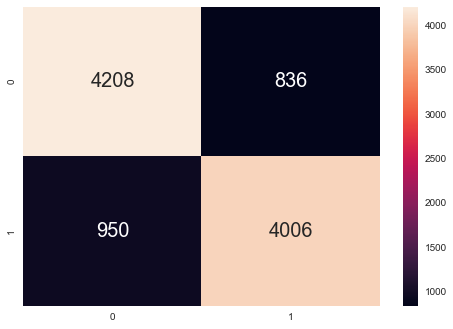

In [178]:
#visualization of the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [179]:
#checking the accuracy for testing data

test_accu[2]=accuracy_score(y_test,y_test_pred)

print("Random Forest Classification Test Accuracy: ",test_accu[2])

Random Forest Classification Test Accuracy:  0.8214


# Comparison of Accuracy Scores

In [180]:
#defining labels and printing accuracies
labels=['Naive Bayes','Logistic Regression','Random Forest']
print("Train accuracies: ",train_accu)
print("Test Accuracies: ",test_accu)

Train accuracies:  [0.89815  0.930675 1.      ]
Test Accuracies:  [0.8607 0.8984 0.8214]


Accuracy Comparision for TRAIN data for all the models:




Text(0.5, 1.0, 'Train Accuracy of various algorithms')

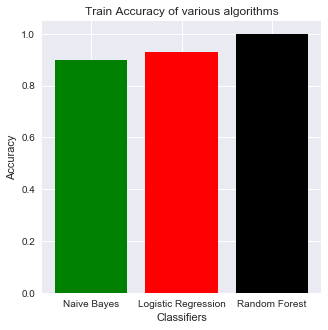

In [182]:
#visualizing the train accuracies of all the models
print("Accuracy Comparision for TRAIN data for all the models:\n\n")
plt.subplots(figsize=(5,5))
plt.bar(labels,train_accu,color=['green','red','black'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Train Accuracy of various algorithms')

Accuracy Comparision for TEST data for all the models:




Text(0.5, 1.0, 'Test Accuracy of various algorithms')

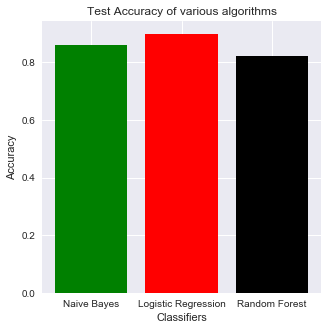

In [183]:
#visualizing the test accuracies of all the models
print("Accuracy Comparision for TEST data for all the models:\n\n")
plt.subplots(figsize=(5,5))
plt.bar(labels,test_accu,color=['green','red','black'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Test Accuracy of various algorithms')

# We can infer that Logistic Regression algorithm has the highest accuracy with 0.89 on test data among all the 3 algorithms

# So we perform Hyper Parameter tuning on logistic regression to increase the accuracy score

# Hyper parameter tuning of Logistic Regression

In [52]:
#Passing list of values  in a dictionary to find the optimum value for each parameter
grid_param = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'intercept_scaling' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept' : ['True','False']
    
}

In [53]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
clf = LogisticRegression()
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param)

# applying gridsearch onto dataset
grid_search.fit(X_train_transformed, y_train)

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Varun\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': ['True', 'False'],
                         'intercept_scaling': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='

In [54]:
# return the optimal parameters
grid_search.best_params_

{'C': 10, 'fit_intercept': 'True', 'intercept_scaling': 0.01, 'penalty': 'l2'}

In [55]:
#Build the model with best parameters
#Initialized the DT Classifier
clf = LogisticRegression(C=10, fit_intercept=True, intercept_scaling=0.01, penalty='l2')

# We need to fit the model to the data
clf.fit(X_train_transformed, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=0.01, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
#predicting on testing data
y_test_pred =clf.predict(X_test_transformed)
y_test_pred

array(['negative', 'negative', 'negative', ..., 'positive', 'positive',
       'negative'], dtype=object)

In [57]:
#printing the confusion matrix
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[4522,  522],
       [ 446, 4510]], dtype=int64)

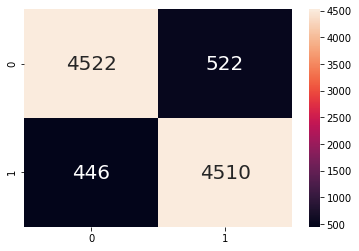

In [58]:
#visualization of the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [59]:
#checking the accuracy for testing data
accuracy_score(y_test,y_test_pred)

0.9032

In [60]:
#printing the classification report
print(classification_report(y_test,y_test_pred)) 

              precision    recall  f1-score   support

    negative       0.91      0.90      0.90      5044
    positive       0.90      0.91      0.90      4956

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# We can see that the accuracy score has increased to 0.90 from 0.89

# Testing with unknown input

In [184]:
## Sample Input
new=(["Beautiful Mind is a biographical movie about John Forbes Nash junior, mathematical genius with hard fate. At the beginning of his career he has made enormous contribution in the field of Game Theory, which was a revolution in this mathematical area and almost brought international fame to the author. The movie was filmed in 2001 by Ron Howard and today it is called modern classics: a true drama, making you think and evoking emotions.Such movies, telling us about the life of a famous person, are always difficult to assess, because any such creations somehow pretend to be biographical ones. But in fact they are just a glance of one particular producer on the life of another individual. Of course, much depends on the actor who will perform the role of the protagonist and after watching Beautiful Mind I will agree with this once again."])

In [188]:
## Applying tfidf vectorization
X_new_transformed = tfidf.transform(new)

In [189]:
## Predicting the sample input
y_new_pred =clf.predict(X_new_transformed)
y_new_pred

array(['positive'], dtype=object)

# We can clearly see that the accuracy score of Logistic Regression on test data after hyper parameter tuning has increased to 0.90 from 0.89

# Roc Auc Curve

In [61]:
#training the models
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [62]:
#naive bayes,logistic regression(after hyper parameter tuning),random forest
model_BernNB = BernoulliNB()
clf = LogisticRegression(C=10, fit_intercept=True, intercept_scaling=0.01, penalty='l2')
rfc = RandomForestClassifier(n_estimators = 40)


In [63]:
#fitting the models
model_BernNB.fit(X_train_transformed,y_train)
clf.fit(X_train_transformed,y_train)
rfc.fit(X_train_transformed,y_train)

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
#predicting the probabilities
pred_prob1=model_BernNB.predict_proba(X_test_transformed)
pred_prob2=clf.predict_proba(X_test_transformed)
pred_prob3=rfc.predict_proba(X_test_transformed)

In [65]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1,tpr1,thresh1 = roc_curve(y_test_pred,pred_prob1[:,1],pos_label='positive')
fpr2,tpr2,thresh2 = roc_curve(y_test_pred,pred_prob2[:,1],pos_label='positive')
fpr3,tpr3,thresh3 = roc_curve(y_test_pred,pred_prob3[:,1],pos_label='positive')

In [66]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test_pred,pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_pred,pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test_pred,pred_prob3[:,1])

print(auc_score1,auc_score2,auc_score3)

0.9505193332718909 1.0 0.9217215737156593


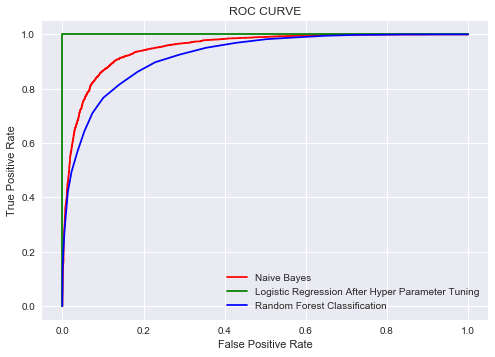

In [67]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#plot roc curves
plt.plot(fpr1,tpr1,linestyle='-',color='red',label='Naive Bayes')
plt.plot(fpr2,tpr2,linestyle='-',color='green',label='Logistic Regression After Hyper Parameter Tuning')
plt.plot(fpr3,tpr3,linestyle='-',color='blue',label='Random Forest Classification')


#title
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

# From the above results,we can infer that for our problem statement,the Logistic Regression Model(with hyper parameter tuning) gave the highest accuracy than the other two models Naive bayes and random forest classification.So Logistic Regression algorithm fits best for our data set